# 3. TimeSeries_Prophet 

In [2]:
beverage <- read.csv("2week/beverage.csv")

In [3]:
head(beverage)

,date,shipment
1,1992-01,3519
2,1992-02,3803
3,1992-03,4332
4,1992-04,4251
5,1992-05,4661
6,1992-06,4811


# ARIMA 

In [4]:
arima(beverage$shipment, c(1,1,0)) # p =1, d = 1, q = 0 // 1차 차분이 전월에 영향을 받는다. 


Call:
arima(x = beverage$shipment, order = c(1, 1, 0))

Coefficients:
          ar1
      -0.0450
s.e.   0.0749

sigma^2 estimated as 107331:  log likelihood = -1290.73,  aic = 2585.46

 - 계절효과 
  - 아래 코드를 기준으로 보면 12개월마다 영향을 받는데, 오차가 영향(MA), 값 자체가 (AR)  => MA(1) 1개월 전 이전 기간의 오차가 영향

In [5]:
m.a <- arima(beverage$shipment, c(1,1,0),
            seasonal= list(order=c(0,0,1), period = 12)) # 계절효과가 12개월 단위로 MA(1) 

In [6]:
m.a # 작년 영향도에 70% 정도 영향을 받는다. 


Call:
arima(x = beverage$shipment, order = c(1, 1, 0), seasonal = list(order = c(0, 
    0, 1), period = 12))

Coefficients:
          ar1    sma1
      -0.1696  0.7150
s.e.   0.0758  0.0551

sigma^2 estimated as 56511:  log likelihood = -1237.62,  aic = 2481.25

 - ARIMA도 장기 트랜드를 없애버리는 기법이라, 장기적으로 미래에 어떤일이 일어날지 예측 할 수 없는 모델이다. 

## Dynamic Linear Model 
 - 기본 함수 lm을 사용 

|y|x|
|--|--|
|92.2월|92.3월|
|92.3월|92.4월| 

- 위와 같은 형태로 만든다. 

In [7]:
n <- length(beverage$shipment)
df = data.frame(y=beverage$shipment[-1], x=beverage$shipment[-n])

In [8]:
m1 <- lm(y~x, df)

In [9]:
m1


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
   519.3468       0.9037  


## dynlm 패키지 

In [10]:
library(dynlm)

In [11]:
beverage <- read.csv('2week/beverage.csv')

In [12]:
head(beverage)

,date,shipment
1,1992-01,3519
2,1992-02,3803
3,1992-03,4332
4,1992-04,4251
5,1992-05,4661
6,1992-06,4811


In [13]:
arima(beverage$shipment, c(1,1,0))  # p = 1, d= 1, q = 0


Call:
arima(x = beverage$shipment, order = c(1, 1, 0))

Coefficients:
          ar1
      -0.0450
s.e.   0.0749

sigma^2 estimated as 107331:  log likelihood = -1290.73,  aic = 2585.46

In [14]:
m.a = arima(beverage$shipment, c(1,1,0),
            seasonal = list(order = c(0, 0, 1), period = 12))  # 12개월 단위 MA(1)

In [15]:
m.a


Call:
arima(x = beverage$shipment, order = c(1, 1, 0), seasonal = list(order = c(0, 
    0, 1), period = 12))

Coefficients:
          ar1    sma1
      -0.1696  0.7150
s.e.   0.0758  0.0551

sigma^2 estimated as 56511:  log likelihood = -1237.62,  aic = 2481.25

## Facebook Prophet
 - 추세와 계절효과에 관심이 많다. 
 - 휴일 추가 가능.
 - 이상점 등, 문제가 있었던 데이트가 있는 경우 날려버린다 그냥. 

In [16]:
library(prophet)

Warning message:
: package 'prophet' was built under R version 3.3.3Loading required package: Rcpp
Warning message:
: package 'Rcpp' was built under R version 3.3.2

### 트랜드 
 - 선형 트렌드와 로지스틱 트렌드 2가지가 가능.
 - 트렌드가 변하는 점(change point)을 자동 추정
 - sparsity parameter(r): 트렌드가 얼마나 자주 변하는지
 - r = 0 트렌드가 불변
 - 커질 수록 자주 변함.
 - pip install fbprophet 으로 설치.
 - DataFrame (DS시간, 데이터)

In [17]:
df <- data.frame(ds = as.Date(as.yearmon(beverage$date)),
                 y = beverage$shipment)

In [18]:
head(df)

,ds,y
1,8035,3519
2,8066,3803
3,8095,4332
4,8126,4251
5,8156,4661
6,8187,4811


 - n_changepoints 를 옵션을 통해 changepoints갯수를 정할 수 있다.
 - changepoint.prior.scale 옵션을 통해서 영향도를 높일수도있고 줄일 수도있다. overfitting, Underfitting 
 - changepoints = c(as.Date('2014-01-01') 를 박아주면 그날 변화가 나타날거라고 예상하고 

In [19]:
m <- prophet(df) # n_changepoints 를 옵션을 통해 changepoints갯수를 정할 수 있다.

STAN OPTIMIZATION COMMAND (LBFGS)
init = user
save_iterations = 1
init_alpha = 0.001
tol_obj = 1e-012
tol_grad = 1e-008
tol_param = 1e-008
tol_rel_obj = 10000
tol_rel_grad = 1e+007
history_size = 5
seed = 1542332295
initial log joint probability = -2.52828
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [20]:
m

$growth
[1] "linear"

$changepoints
 [1] "1992-07-01" "1992-12-01" "1993-06-01" "1993-12-01" "1994-06-01"
 [6] "1994-11-01" "1995-05-01" "1995-11-01" "1996-04-01" "1996-10-01"
[11] "1997-04-01" "1997-10-01" "1998-03-01" "1998-09-01" "1999-03-01"
[16] "1999-09-01" "2000-02-01" "2000-08-01" "2001-02-01" "2001-07-01"
[21] "2002-01-01" "2002-07-01" "2003-01-01" "2003-06-01" "2003-12-01"

$n.changepoints
[1] 25

$yearly.seasonality
[1] TRUE

$weekly.seasonality
[1] TRUE

$holidays
NULL

$seasonality.prior.scale
[1] 10

$changepoint.prior.scale
[1] 0.05

$holidays.prior.scale
[1] 10

$mcmc.samples
[1] 0

$interval.width
[1] 0.8

$uncertainty.samples
[1] 1000

$start
[1] "1992-01-01"

$end
[1] "2006-12-01"

$y.scale
[1] 7270

$stan.fit
NULL

$params
$params$k
[1] 0.275682

$params$m
[1] 0.567932

$params$delta
            [,1]          [,2]       [,3]       [,4]       [,5]         [,6]
[1,] 1.85528e-09 -7.615086e-09 0.04220705 0.06984556 0.04809048 1.610612e-08
              [,7]         [,8]

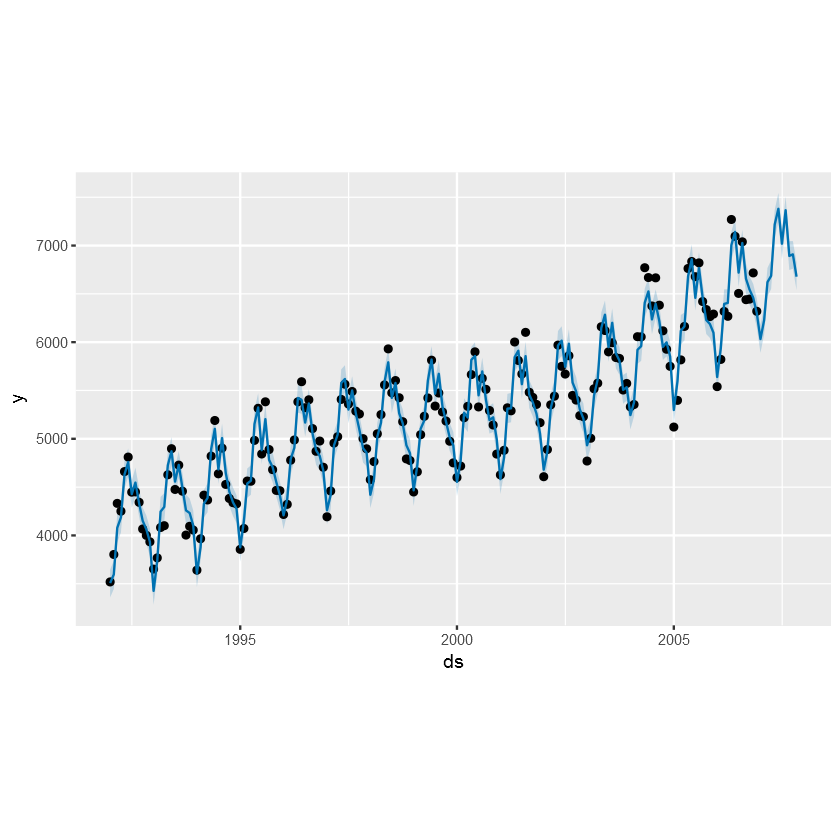

In [21]:
future <- make_future_dataframe(m,periods = 12, freq='month') # 12개월 단위로, 12 week로 하면 12주 치를 예측
forecast = predict(m,future)
plot(m,forecast) # 점이 실제 데이터 파란선이 학습한 값들. 옅은 파란색은 오차구간.

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


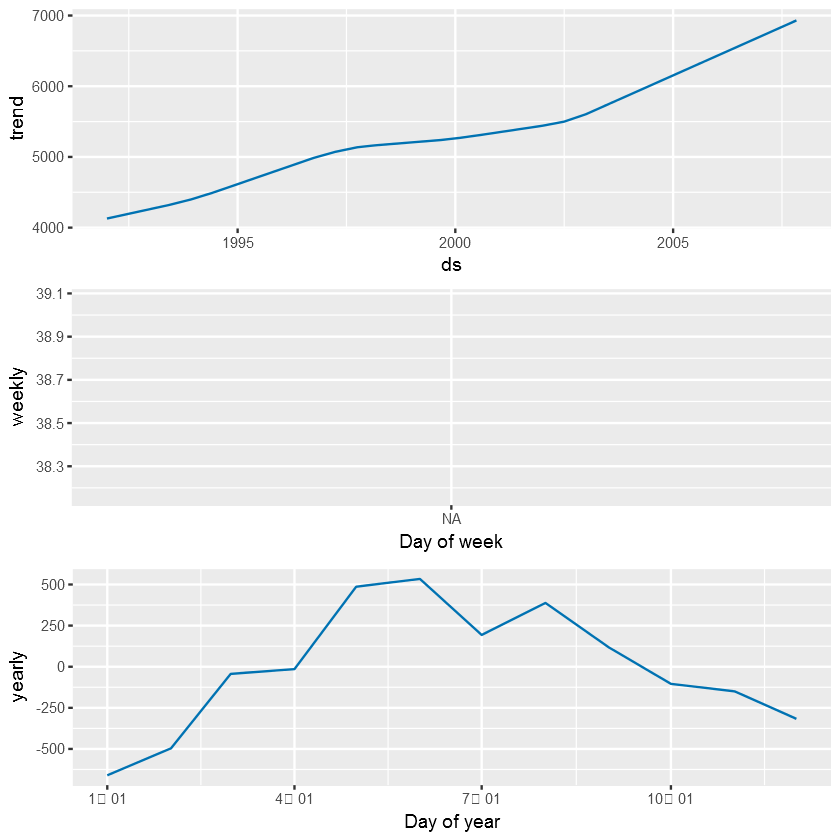

In [22]:
prophet_plot_components(m, forecast) # 분해를 해준다. 데이터가 월단위 데이터라서 그렇다. 주단위로 있을려면 일단위로 있어야 한다. 

### 변화점(change point)

In [23]:
m$params$k #기본 성장률 전 구간에 걸쳐서 얼마나 성장하는 추세인가. 1개월마다 평균적으로 0.27씩 성장한다. 

[1] 0.275682

In [24]:
m$changepoints #변화점

 [1] "1992-07-01" "1992-12-01" "1993-06-01" "1993-12-01" "1994-06-01"
 [6] "1994-11-01" "1995-05-01" "1995-11-01" "1996-04-01" "1996-10-01"
[11] "1997-04-01" "1997-10-01" "1998-03-01" "1998-09-01" "1999-03-01"
[16] "1999-09-01" "2000-02-01" "2000-08-01" "2001-02-01" "2001-07-01"
[21] "2002-01-01" "2002-07-01" "2003-01-01" "2003-06-01" "2003-12-01"

 - 휴일데이터를 DataFrame으로 만들어서 넣어줄수가 있다. 
 - 추가적인 데이터를 넣을 수는 없지만, 예를 들어 기록적을 더웠던 날을 holiday에 넣는다면 가능하다. 

In [25]:
m$params$delta

1.85528001895657e-09,-7.61508619178786e-09,0.0422070455922757,0.0698455570311095,0.048090477618096,1.61061158302459e-08,-5.02665873896983e-09,1.10209629571231e-08,-3.40356579909238e-08,-0.0806817457790005,...,0.0408411742623898,0.0327274144018401,0.0130642330615311,3.77284295088247e-06,2.11400597579396e-08,0.050315135047391,0.190903692933042,0.13308331211642,-2.11785608596451e-10,-1.22720161764703e-08


In [26]:
m$params$delta[1,1] # 1.85528e-09 

[1] 1.85528e-09

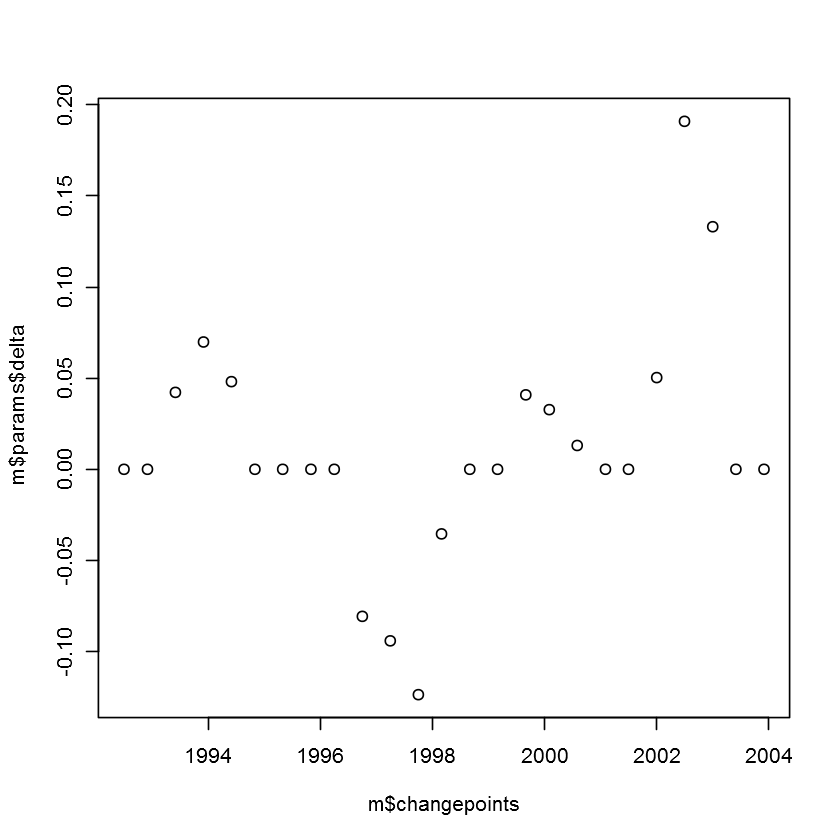

In [27]:
plot(m$changepoints,m$params$delta) # 트렌드 그래프와 비교해서 보면 좋다 

#### 광고 효과가 있는지 없는 볼때 가속이 되었는지 아닌지 보면 알수있다. 